# DS5001 Final Report

Name: Theodore Thormann (nxb5kp@virginia.edu) <br>
Class: DS5001 Spring '23

## Introduction

Horror films have been a staple of cinema since the first horror movie “Le Manoir du Diable” or, in English, “The House of the Devil” directed by the French director Georges Méliès in 1896. Since then, the genre has experienced ups and downs throughout the decade and has exploded into a plethora of subgenres like the slasher, the demonic possession film, the paranormal, among many, many others. Until recently, horror films have largely been dismissed by the academic community as drivel. However, a recent revival in the horror genre has led many academics to look more critically at the horror films of the past in a more scholarly light. Kendall Phillips book “Projected Fears: Horror Films and American Culture” offers a strong thesis on why horror films are worthy of the academic spotlight when discussing American culture. He says, “…while any given film can be frightening to any given individual, certain films become the touchstone of fear for an entire generation. It is as if, at certain points, a particular film so captures our cultural anxieties and concerns that our collective fears seem projected onto the screen before us.” (Phillips). <br>
<br>
Phillips touches on an interesting point about certain films that transcend their genre and strike fear into an entire generation. While Phillips posits this generational fear, this paper is interested in seeing if those fears can be seen in text analysis and perhaps even if there are certain films from a generation they are noticeable across all generations. This question of fear over time is not completely novel as can be seen through John Kenneth Muir’s scholarly book series which investigates horror films by decade. While the majority of this project looks at seminal horror films from the 1980s, 1990s, and 2000s as a whole, there are points when a finer examination is conducted into each of these generations.

## Source Data

The corpus used for this project was titled “Film Corpus 2.0” and was obtained from the Baskin Engineering Lab at University of California, Santa Cruz. The corpus contains the complete text files for 1068 films. The .txt files were originally obtained by the authors in 2015 by scraping files from imdsb.com, a film script database. The original corpus contains 149 horror film scripts.

37 horror films were chosen for this analysis. These 37 films were chosen for several reasons. Primarily, they used conventional scene slug lines such as INT or EXT or MONTAGE to denote scene changes. Scene changes were a crucial delimiter in my analysis and were used to divide screenplays similar to how chapters divide novels. The screenplay also had to have a reasonable number of scenes to be chosen for analysis. A screenplay needed to have a minimum of 50 scenes for this analysis. 50 scenes was an arbitrary cutoff. The average film in this corpus has 153 scenes and an average of 22,654 tokens.

I also chose these 37 films because they were all from the three decades analyzed in this paper. The three decades analyzed in this paper are the 1980s, the 1990s, and the 2000s. Films released between 1980-1989 were placed in the 1980s category, films released between 1990-1999 were placed in the 1990s category, and films released between 2000-2010 were placed in the 2000s category. Two films from 2010, Insidious and Legion, were present in my corpus and were placed in the 2000s decade for use in this analysis. There are 8 films in the 1980 category, 10 films in the 1990 category, and 19 films in the 2000s category.

A link to the 37 .txt screenplay files can be found here at UVA Box: https://virginia.box.com/s/jmrw18xum970zrjkupuk6e7yy0claq6k

## Data Model

These tables can be accessed at the following link: https://virginia.box.com/s/4zfi385yvykwvuui179slxfubf22t5cq

This project consists of 21 CSV tables

### Data Table Descriptions

#### CORPUS & CORPUS_1980 & CORPUS_1990 & CORPUS_2000:
This table uses the OHCO: Movie_id, Scene_id, Sent_num, Token_num as an index. The purpose of this table is to capture all tokens present in the corpus and split them into different levels using the OHCO. This table also contains the part of speech of the associated token. This was accomplished using Natural Language Toolkit (NLTK) auto POS tagging in python.

| Column    | Type  | Description                                                                            |
|-----------|-------|----------------------------------------------------------------------------------------|
| movie_id  | int   | The ID of the associated film in the corpus                                            |
| scene_id  | int   | The scene number in the film                                                           |
| sent_num  | int   | The sentence number in the scene                                                       |
| token_num | int   | The token number in the sentence                                                       |
| pos_tuple | object | The token and its NLTK tagged part of speech                                           |
| pos       | object   | The part of speech associated with the token                                           |
| token_str | object   | A token in the corpus                                                                  |
| term_str  | object   | A normalized version of a token in the corpus in lowercase with any characters removed |

CORPUS contains all the films in the corpus.
CORPUS_1980 & CORPUS_1990 & CORPUS_2000 contain only films for that decade.

#### VOCAB & VOCAB_1980 & VOCAB_1990 & VOCAB_2000:
This table uses term_str (a list of every term present in the corpus) as the index. This table includes information about to how each term appears in the corpus.

| Column         | Type  | Description                                                                  |
|----------------|-------|------------------------------------------------------------------------------|
| term_str       | object   | A term in the corpus                                                         |
| n              | int   | The number of times that term appears in the corpus                          |
| n_chars        | int   | The number of characters of the term                                         |
| p              | float | The probability of that term appearing in the corpus                         |
| i              | float | The inverse log of the probabily                                             |
| max_pos        | object   | The most frequently associated part-of-space category for each token         |
| n_pos          | object   | The number of parts of speech associated with that token                     |
| cat_pos        | list  | A concatenated list of all the parts of speech associated with that token    |
| stop           | int   | 1 indicates the token is a stopword, 0 indicates the token is not a stopword |
| stem_porter    | object   | Porter stemming algorithm applied to the term                                |
| stem_snowball  | object   | Snowball stemming algorithm applied to the term                              |
| stem_lancaster | object   | Lancaster stemming algorithm applied to the term                             |
| tfidf          | float | Term frequency-inverse document frequency                                    |
| dfidf          | float | Document frequency-inverse document frequency                                    |

VOCAB contains all the films in the corpus
VOCAB_1980 & VOCAB_1990 & VOCAB_2000 contain only vocab tables for films for that decade


#### LIB:
This table contains the metadata of the project. The source_file_path contain data relevant to the author's machine and will need to be altered to be used on other machines.

| Column           | Type | Description                       |
|------------------|------|-----------------------------------|
| movie_id         | int  | The ID associated with that movie |
| movie_title      | object  | The title of the movie            |
| source_file_path | object  | The path to the source file       |
| year             | int  | The year of the film's release    |
| decade           | int  | The decade of the film's release  |
| movie_len        | int  | The number of tokens in the movie |
| n_scenes         | int  | The number of scenes in the movie |

#### DOC:
This table also contains the metadata for the project with a `title` column added. This table is mostly used in figures produced for the interpretation of the corpus.

| Column           | Type | Description                                |
|------------------|------|--------------------------------------------|
| movie_id         | int  | The ID associated with that movie          |
| scene_id         | int  | The scene number in the movie              |
| movie_title      | object  | The title of the movie                     |
| source_file_path | object  | The path to the source file                |
| year             | int  | The year of the film's release             |
| decade           | int  | The decade of the film's release           |
| movie_len        | int  | The number of tokens in the movie          |
| n_scenes         | int  | The number of scenes in the movie          |
| title            | object  | The movie title concatenated with the year |


#### TFIDF (Term Frequency-Inverse Document Frequency):
This table is used to quantify the importance of each term in a collection of documents. It is constructed by calculating two values for each term in each document: the term frequency (TF), which measures how frequently the term appears in the document, and the inverse document frequency (IDF), which measures how important the term is across the entire collection of documents. A high TFIDF score indicates that the term is both frequent in the document and rare in the collection, making it a good indicator of the document's content.

This table consists of one column that is the movie_id, one column that is the scene_id in that movie, and a column for each of the top 1000 terms by TFIDF in the corpus. The number below is that term's TFIDF value in that scene.

| Column   | Type | Description                                               |
|----------|------|-----------------------------------------------------------|
| movie_id | int  | The movie ID associated with a particular film            |
| scene_id | int  | The scene number in that film                             |
| term     | float  | Each token in the corpus is represented as a separate column. The number below that column is that term's TFIDF value in that scene. |

#### DFIDF (Document Frequency-Inverse Document Frequency):

| Column   | Type  | Description          |
|----------|-------|----------------------|
| term_str | object   | A term in the corpus |
| DFIDF    | float | DFIDF of term        |

#### COMPS:
This is a table of principal components to be used in principal component analysis (PCA).

| Column   | Type  | Description                                              |
|----------|-------|----------------------------------------------------------|
| pc_id    | object   | ID number associated with that principal component       |
| eig_val  | float | The eigen value associated with that principal component |
| term_str | object   | A term in the corpus                                     |

#### LOADINGS:
This table contains information on how much the associated term contributes to the PCA.

| Column   | Type  | Description                                                         |
|----------|-------|---------------------------------------------------------------------|
| term_str | object   | A term in the corpus                                                |
| pc_val   | float | The contribution of the index term to the principal component value |

#### DCM (Document Component Matrix):
This table contains information on how much the associated term contributes to the PCA in the context of a film and scene.

| Column   | Type  | Description                                                         |
|----------|-------|---------------------------------------------------------------------|
| movie_id | int   | The movie ID associated with a particular film                      |
| scene_id | int   | The scene number in that film                                       |
| pc_id    | float | The contribution of the index term to the principal component value |

#### THETA:
This table shows how much each scene in the movie relates to the given topic of the topic model 

| Column            | Type  | Description                                                                    |
|-------------------|-------|--------------------------------------------------------------------------------|
| movie_id          | int   | The movie ID associated with a particular film                                 |
| scene_id          | int   | The scene number in that film                                                  |
| topic_association | float | How much each scene in the movie relates to the given topic of the topic model |

#### PHI:
This table shows how much each term contributes to a given topic

| Column   | Type | Description             |
|----------|------|-------------------------|
| topic_id | object  | The ID of a given topic |
| term_str | object  | A term in the corpus    |

#### TOPICS:
This table shows every topic and what words are associated with that topic

| Column   | Type | Description             |
|----------|------|-------------------------|
| topic_id | object  | The ID of a given topic |
| term_associations | object  | Words assoicated with the topic   |

#### sentiment_polarity:
This table shows the sentiment of a movie from -1 to 1 with -1 being negative sentiment and 1 being positive sentiment. Sentiment is a measure of the emotional tone expressed in the language used in the text.

| Column      | Type  | Description                                                                                                       |
|-------------|-------|-------------------------------------------------------------------------------------------------------------------|
| movie_title | object   | The title of a film                                                                   |
| sentiment   | float | The overall sentiment of a movie between -1 and 1 with -1 being negative sentiment and 1 being positive sentiment |

#### emotions:
This table shows how much each film is associated with one of eight different emotions. The eight emotions are from Plutchik's Wheel of Emotions, which identifies eight primary emotions.

| Column       | Type  | Description                                                                                                       |
|--------------|-------|-------------------------------------------------------------------------------------------------------------------|
| movie_title  | object   | The title of a film                                                                                               |
| anger        | float | Amount the film is associated with anger on a scale of 0-1                                                        |
| anticipation | float | Amount the film is associated with anticipation on a scale of 0-1                                                 |
| disgust      | float | Amount the film is associated with disgust on a scale of 0-1                                                      |
| fear         | float | Amount the film is associated with fear on a scale of 0-1                                                         |
| joy          | float | Amount the film is associated with joy on a scale of 0-1                                                          |
| sadness      | float | Amount the film is associated with sadness on a scale of 0-1                                                      |
| surprise     | float | Amount the film is associated with surprise on a scale of 0-1                                                     |
| trust        | float | Amount the film is associated with trust on a scale of 0-1                                                        |
| sentiment    | float | The overall sentiment of a movie between -1 and 1 with -1 being negative sentiment and 1 being positive sentiment |


## Exploration

### Cluster Analysis

Hierarchical clustering was performed using all films in the corpus. 5 different distance measures were used. Pictured below are the 2 dendrograms that I felt most accurately represented the corpus. City block distance measure was used on the corpus without norming using weighted linkage visualized below:

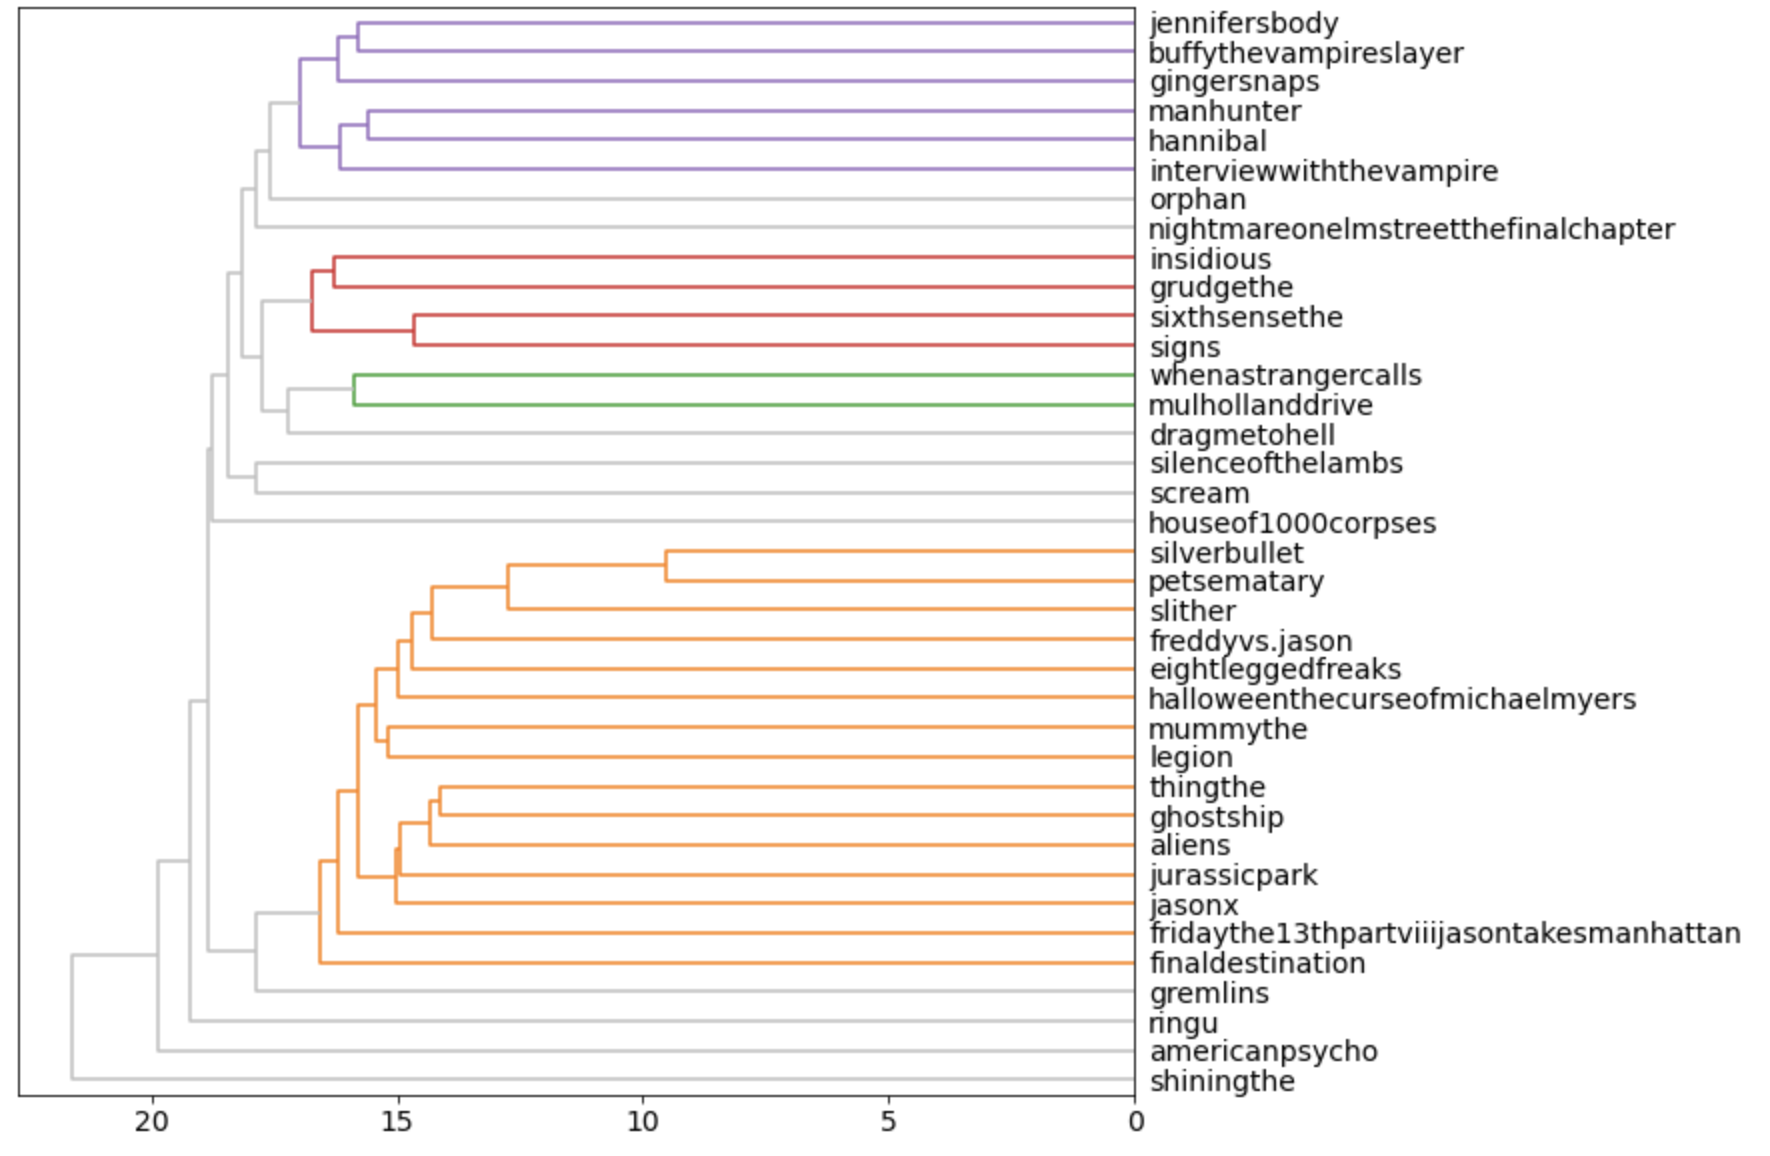

Cosine distance measure was used on the corpus without norming using ward linkage visualized below:

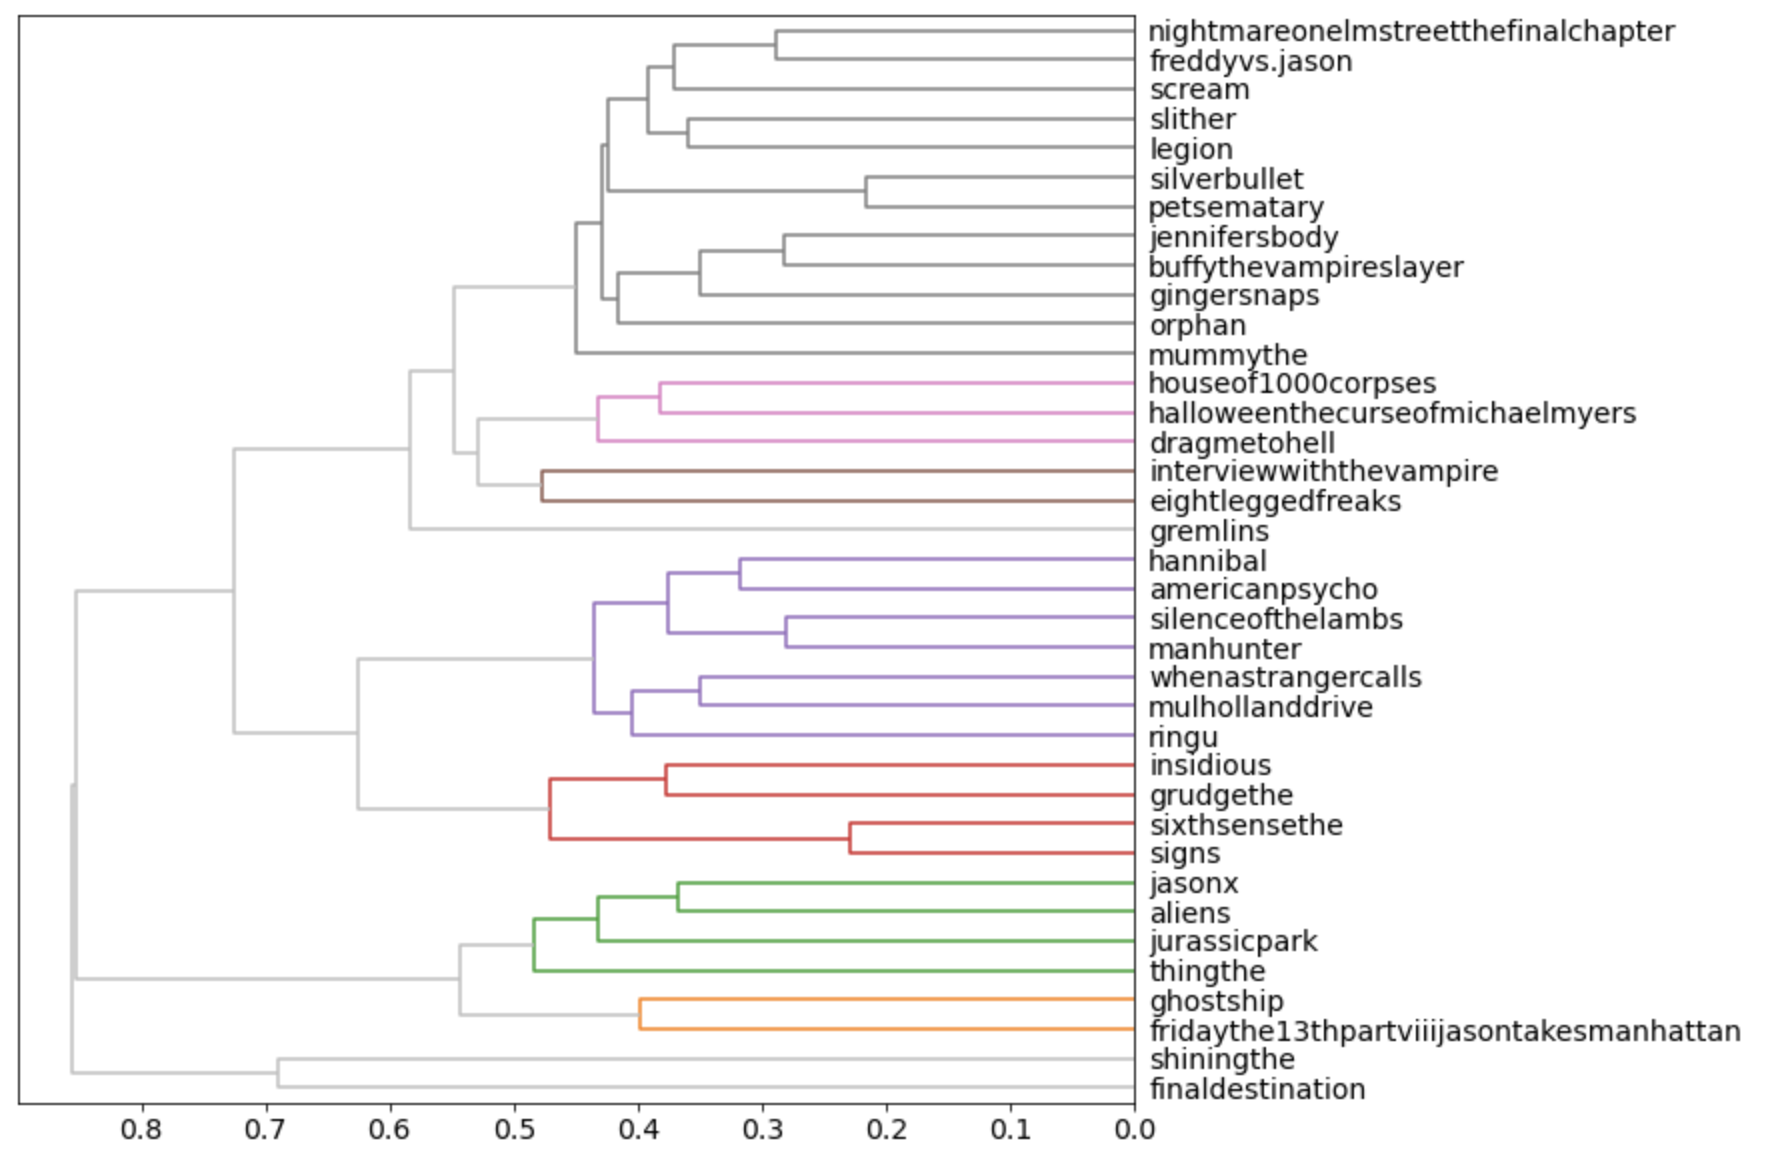

These 2 linkages do an excellent job of showing subgenre. In both dendrograms, films with female antagonists characters; Jennifer's Body, Buffy the Vampire Slayer, Gnger Snaps, and Orphan; are clustered together. These films all revolve around female teen anatagonists. In the City Block dendrogram there are 7 clusters and in the Cosine dendrogram there are 9 clusters. At the top of the Cosine dendrogram are slasher films such as one of the Nightmare on Elm Street films, Freddy vs. Jason, and Scream, among others. Another interesting cluster in the dendrogram are Insidious, The Grudge, The Sixth Sense, and Signs. These films all deal with the paranormal, so it makes sense theya re clustered together. Interestingly, The Shining nearly defies classification since it lies outside of most clusters. The uniqueness of The Shining can also be seen in the PCA.

### Principal Component Analysis (PCA)

3 different PCA plots were produced. In order to perform PCA, first the TFIDF table had to be normalized using L2 normalization. A Covariance matrix then had to be produced from that normalized TFIDF. Eigendecomposition was then performed to obtain eigenvectors and eigenvalues. The eigenvectors and eigenvalues are then joined together in a table. 10 components are then produced. A loadings table is then produced. Loadings sow the contribution of each term to the component. The 10 components produced earlier are then projected onto each movie scene in the corpus.

PCA 0 on the negative end deals with interiority, while the positive end deals with exterior settings. PCA 1 on the negative end deals with exteriority, while the positive end deals with rooms and interiority. PCA 2 on the negative end deals with land, while on the positive end deals with water. PCA 3 on the negative end deals with water, while on the positive end it deals more with the senses.

These 3 difference pairs of components have been visulaized below. The graph on the top is broken up by decade and the bottom of the graph shows a scatter plot with the entire corpus broken up by scene.

#### PCA 0 - PCA 1
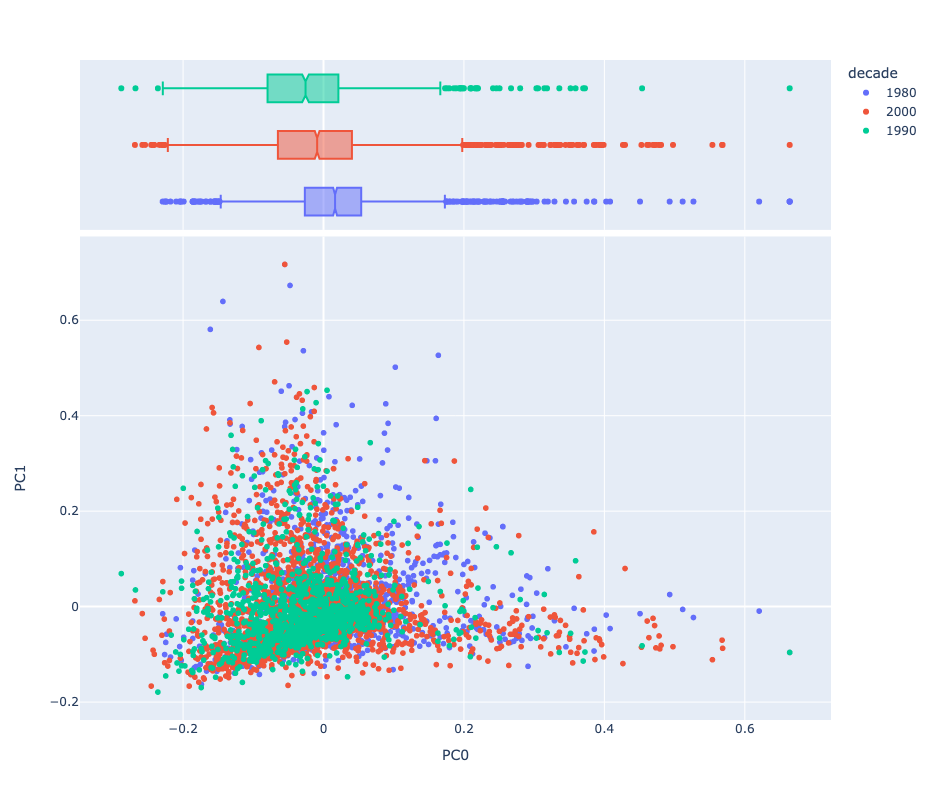

The large outliers by decade in the 1980s are scenes from Silver Bullet and The Shining. The large outlier by decade in the 2000s is a scene in Drag Me to Hell.

#### PCA 1 - PCA 2
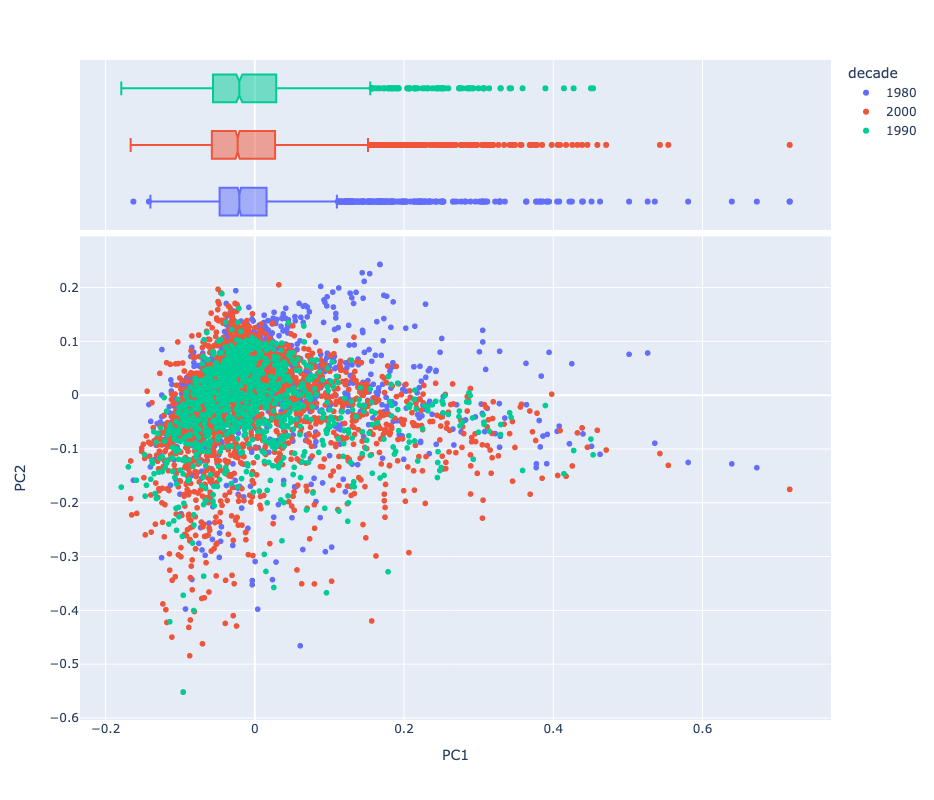
The large outliers by decade in the 1980s are scenes in Friday the 13th Part VIII and The Shining. The large outlier by decade in the 2000s is a scene in Slither.

#### PCA 2 - PCA 3
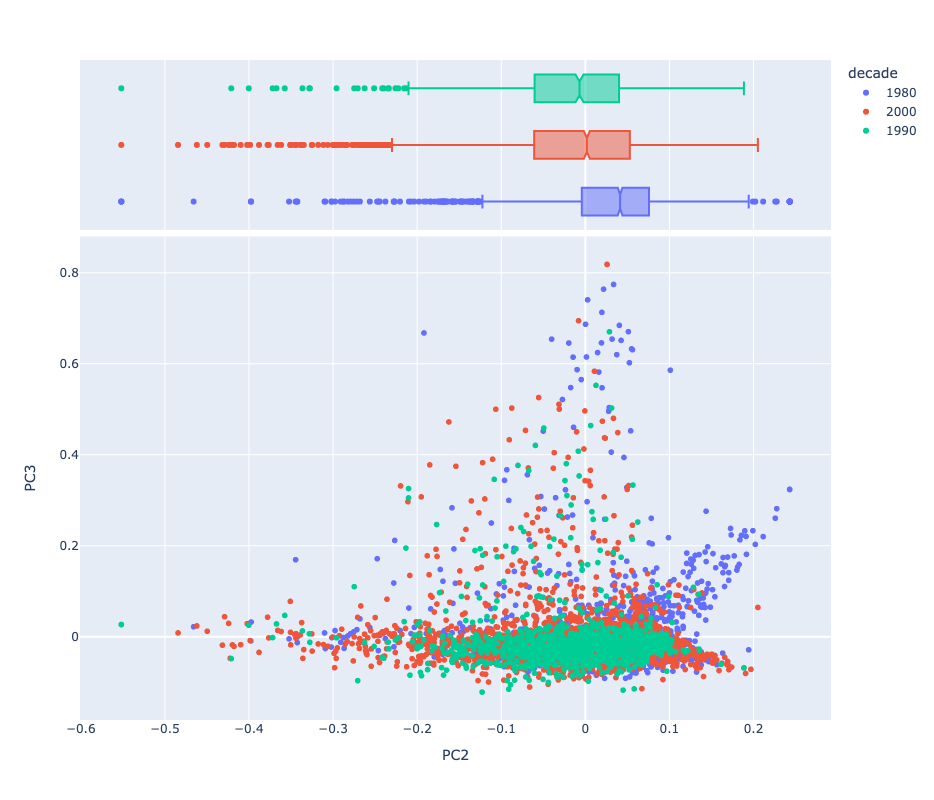
The large outlier by decade in the 1980s is a scene from Silver Bullet. The large outlier in the 1990s is a scene in Buffy the Vampire Slayer. The large outlier by decade in the 2000s is a scene in Drag Me to Hell.

### Latent Dirichlet Allocation (LDA)

First TFIDF and DFIDF tables had to be produced from the corpus. 7 top terms were used for this analysis. Using Scikit Learn's Latent Dirichlet Allocation algorithm with hyperparameters n_components=20, max_iter=5, learning_offset=50, and random_state=0 a LDA model was created. A theta table shows how much each scene in the movie relates to the given topic of the topic model and a phi table shows how much each term contributes to a given topic. Using these tables, topics were created and top terms per topic were created as seen below:

| topic_id |   0    |   1    |   2   |   3    |   4   |   5   |   6   |
|----------|--------|--------|-------|--------|-------|-------|-------|
| T00      | camera | corridor | bg    | floor  | caml  | hands | vo    |
| T01      | ship   | light    | man   | bed    | beat  | door  | water |
| T02      | face   | eyes     | hair  | hand   | room  | blood | hands |
| T03      | door   | room     | eyes  | floor  | hall  | hand  | stairs|
| T04      | door   | house    | eyes  | kitchen| bathroom| room | walks|
| T05      | beat   | eyes     | face  | way    | time  | man   | head  |
| T06      | arms   | car      | eyes  | body   | window| time  | look  |
| T07      | car    | body     | face  | eyes   | hand  | creature| feet|
| T08      | face   | inside   | way   | hand   | wall  | look  | gun   |
| T09      | starling| dog     | radio | ice    | time  | men   | dogs  |
| T10      | way    | hand     | face  | door   | eyes  | room  | steps |
| T11      | water  | head     | eyes  | hand   | man   | face  | dog   |
| T12      | wall   | spiders  | window| tv    | face   | water | town |
| T13      | night  | car      | sir   | window | house | police | creatures|
| T14      | door   | window   | hand  | street | car   | floor | apartment|
| T15      | vo     | eyes     | tape  | bed    | way   | hand  | body  |
| T16      | eyes   | face     | head  | hand   | floor | os    | screen|
| T17      | time   | room     | head  | eyes   | thing | hand  | day   |
| T18      | phone  | beat     | os    | table  | hand  | desk  | room  |
| T19      | car    | road     | door  | truck  | head  | feet  | cruiser|

These topics were then divided by decade. <br>
1980s:

| topic_id |    0     |      1      |   2   |   3    |    4   |   5   |  6  |              label                | doc_weight_sum | term_freq |   1980  |   1990  |   2000  |
|----------|----------|-------------|-------|--------|--------|-------|-----|----------------------------------|----------------|-----------|---------|---------|---------|
| T00      | camera   | corridor    | bg    | floor  | caml   | hands | vo  | T00 camera, corridor, bg, floor, caml, hands, vo | 247.184889     | 0.029099  | 0.073252 | 0.027689| 0.026353|
| T03      | door     | room        | eyes  | floor  | hall   | hand  | stairs| T03 door, room, eyes, floor, hall, hand, stairs | 454.938226     | 0.089797  | 0.068156 | 0.082881| 0.090837|
| T18      | phone    | beat        | os    | table  | hand   | desk  | room| T18 phone, beat, os, table, hand, desk, room | 392.113211     | 0.089722  | 0.066937 | 0.062149| 0.075512|

1990s:

| topic_id | term_str |    0    |    1    |    2    |    3    |    4    |    5    |    6    |             label              | doc_weight_sum | term_freq |  1980   |   1990   |   2000   |
|----------|----------|---------|---------|---------|---------|---------|---------|---------|--------------------------------|----------------|-----------|---------|----------|----------|
|   T03    |   door   |   room  |   eyes  |  floor  |   hall  |   hand  | stairs  |   T03   |  door, room, eyes, floor, hall, hand, stairs  |    454.938226  |   0.089797 | 0.068156 | 0.082881 | 0.090837 |
|   T02    |   face   |   eyes  |   hair  |   hand  |   room  |  blood  |  hands  |   T02   | face, eyes, hair, hand, room, blood, hands |    303.041983  |   0.061379 | 0.049363 | 0.079410 | 0.046203 |
|   T17    |   time   |   room  |   head  |   eyes  |  thing  |   hand  |   day   |   T17   | time, room, head, eyes, thing, hand, day  |    324.275656  |   0.081621 | 0.040361 | 0.073429 | 0.065263 |

2000s:

|topic_id|0|1|2|3|4|5|6|label|doc_weight_sum|term_freq|1980|1990|2000|
|-------|---|---|---|---|---|---|---|-----|------------|----------|------|------|------|
|T03|door|room|eyes|floor|hall|hand|stairs|T03 door, room, eyes, floor, hall, hand, stairs|454.938226|0.089797|0.068156|0.082881|0.090837|
|T18|phone|beat|os|table|hand|desk|room|T18 phone, beat, os, table, hand, desk, room|392.113211|0.089722|0.066937|0.062149|0.075512|
|T01|ship|light|man|bed|beat|door|water|T01 ship, light, man, bed, beat, door, water|284.705459|0.040364|0.043071|0.028421|0.067081|

As seen above, topic 3 can be seen in across all decades and topic 18 can be seen in 2 of the 3 decades discussed.

### Word Embedding

Word2Vec interpretation was conducted seperately across the 3 decades and then using all 3 decades combined into the same word2vec. The same hyperparameters were used for all 4 word2vec vectorizers. Those hyperparameters were window = 2,min_count = 50, and vector_size = 256 to create our models. The hyperparameters used for the tsne_engines created using all 4 corpora were perplexity=20, n_components=2, init='random', n_iter=1000, random_state=42, and learning_rate=200. 

The visualizations of those can be viewed below. <br>
1980s: <br>
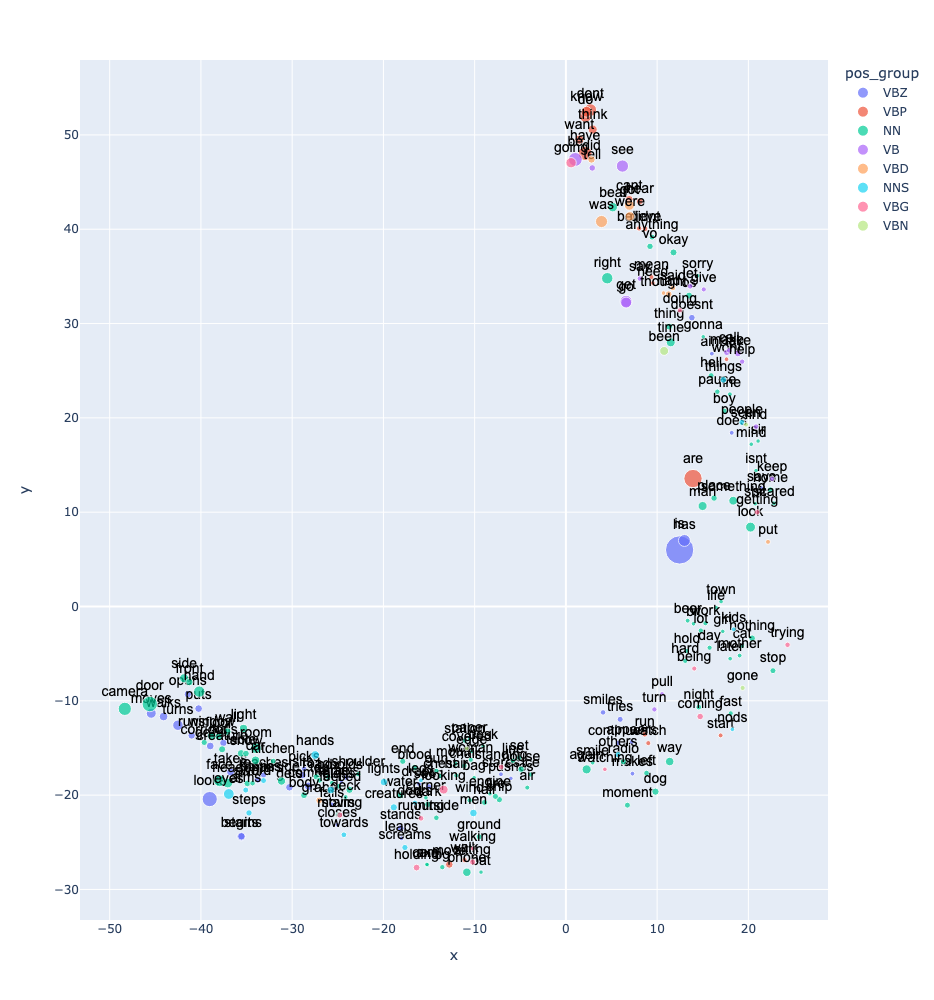

1990s:<br>
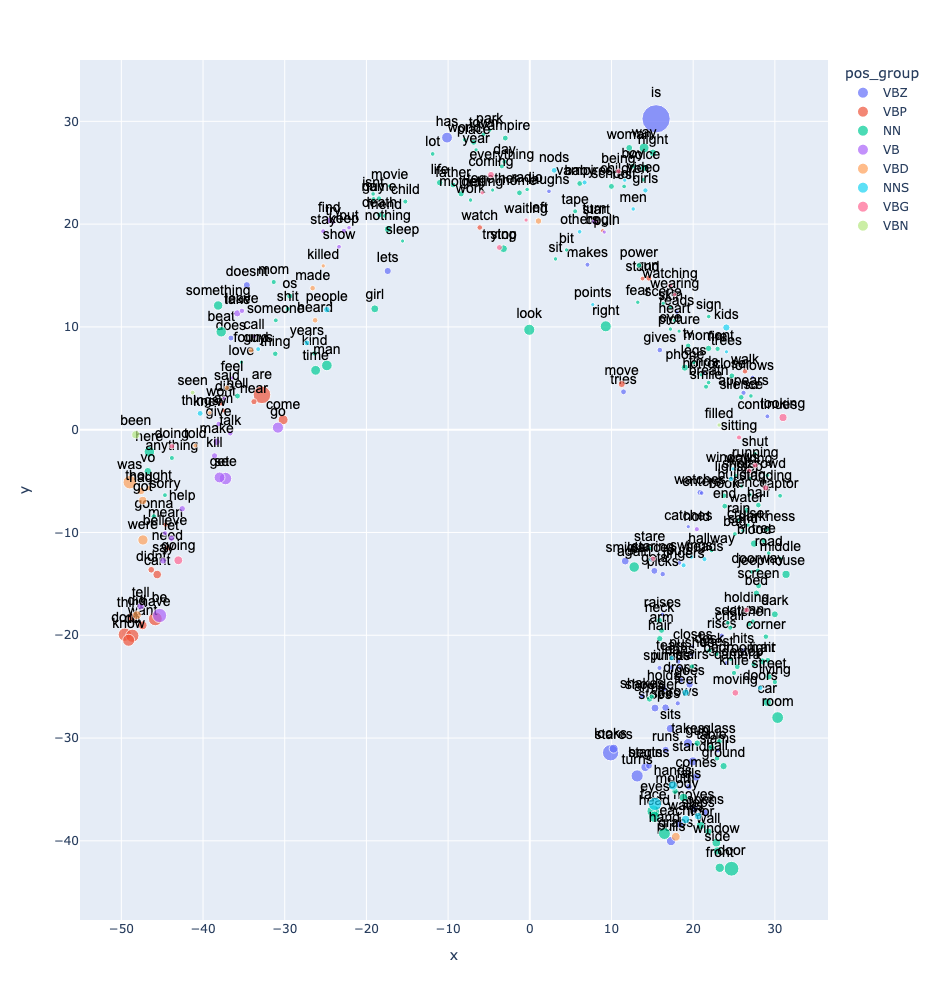

2000s: <br>
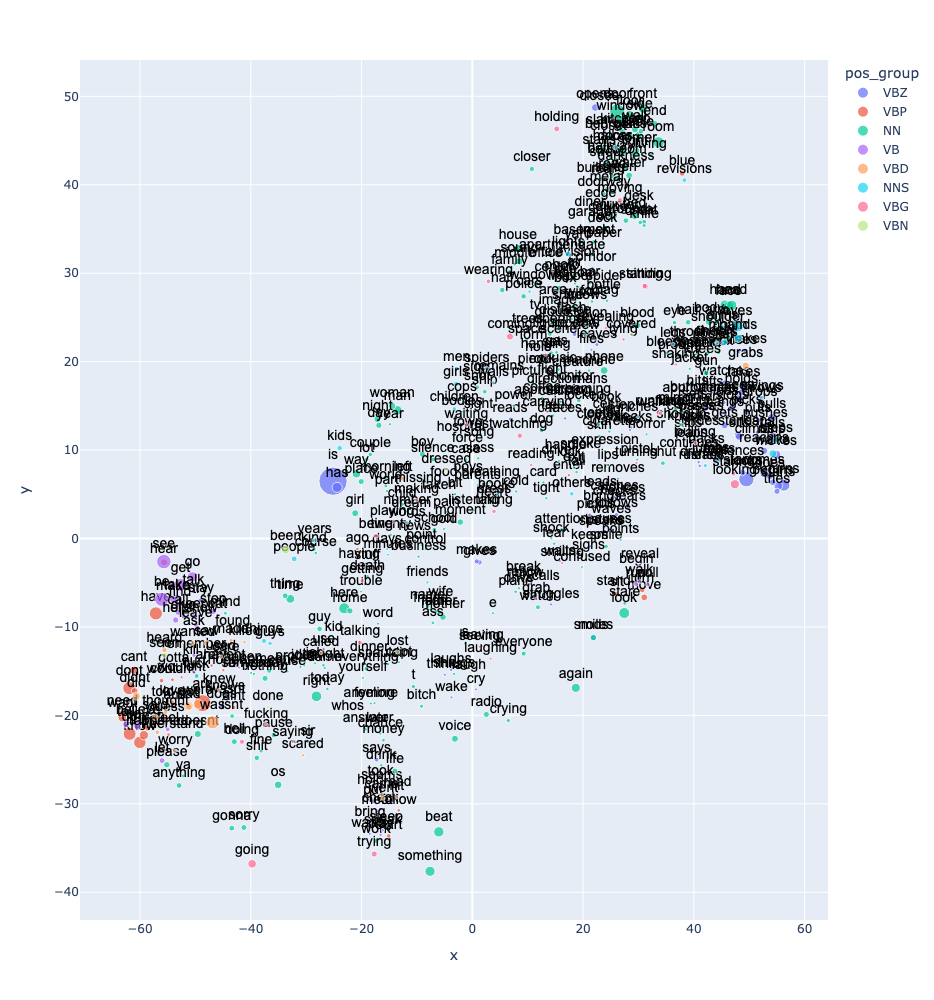

Entire Corpus W2V: <br>
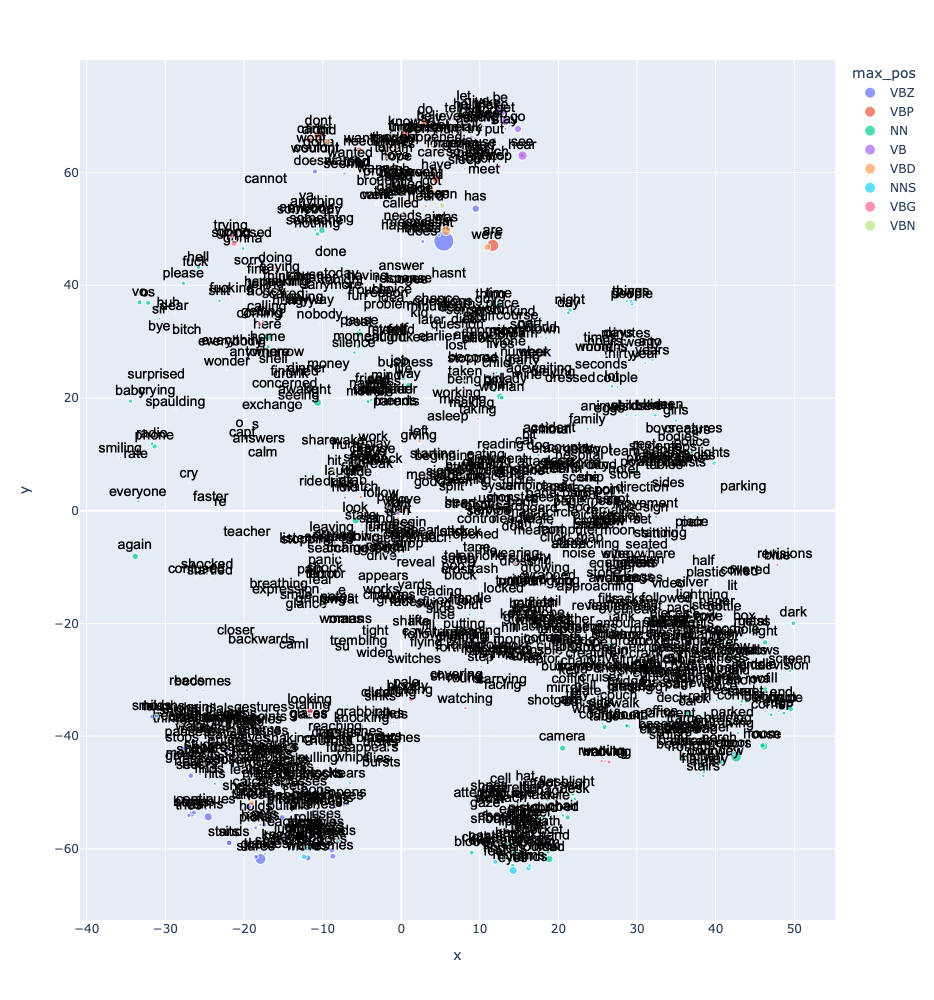

### Sentiment Analysis

Two types of sentiment analysis were performed on the corpus, a sentiment polarity and emotions for each film. This was achived by using a Salex table CSV. A Salex table is a type of sentiment lexicon. It contains a list of words and their associated sentiment polarity scores. The polarity scores indicate whether a given word has a positive, negative, or neutral sentiment. Salex tables can be used to analyze the sentiment of text data by comparing the words in the text to the words in the lexicon and aggregating the polarity scores to generate an overall sentiment score for the text.

The overall sentiment polarity table can be viewed below:

| movie_title                                   | sentiment   |
| --------------------------------------------- | ----------- |
| aliens                                        | -0.350713   |
| americanpsycho                                | -0.045534   |
| buffythevampireslayer                         | -0.137568   |
| dragmetohell                                  | -0.095667   |
| eightleggedfreaks                             | -0.264935   |
| finaldestination                              | -0.193021   |
| freddyvs.jason                                | -0.202889   |
| fridaythe13thpartviiijasontakesmanhattan      | -0.266130   |
| ghostship                                     | -0.078537   |
| gingersnaps                                   | -0.225157   |
| gremlins                                      | -0.012626   |
| grudgethe                                     | -0.124544   |
| halloweenthecurseofmichaelmyers               | -0.204988   |
| hannibal                                      | -0.015250   |
| houseof1000corpses                            | -0.136660   |
| insidious                                     | -0.177383   |
| interviewwiththevampire                       | -0.114903   |
| jasonx                                        | -0.196293   |
| jennifersbody                                 | -0.133237   |
| jurassicpark                                  | 0.012139    |
| legion                                        | -0.212624   |
| manhunter                                     | -0.012045   |
| mulhollanddrive                               | 0.003805    |
| mummythe                                      | -0.297389   |
| nightmareonelmstreetthefinalchapter           | -0.218880   |
| orphan                                        | -0.237513   |
| petsematary                                   | -0.114673   |
| ringu                                         | -0.124240   |
| scream                                        | -0.150239   |
| shiningthe                                    | 0.026481    |
| signs                                         | -0.083199   |
| silenceofthelambs                             | -0.066707   |
| silverbullet                                  | -0.225677   |
| sixthsensthe                                  | 0.016119    |
| slither                                       | -0.034852   |
| thingthe                                      | -0.342130   |
| whenastrangercalls                            | -0.017172   |

The only films that had positive sentment scores in the corpus were Jurassic Park, Mulholland Drive, The Shining, and The Sixth Sense. Even the films that had psoitive sentiment were only barely positive. This makes sense for the corpus because horror movies are rarely happy films. They often deal with dark material and themes.

The emotions of these films can be visualized in the graph below:
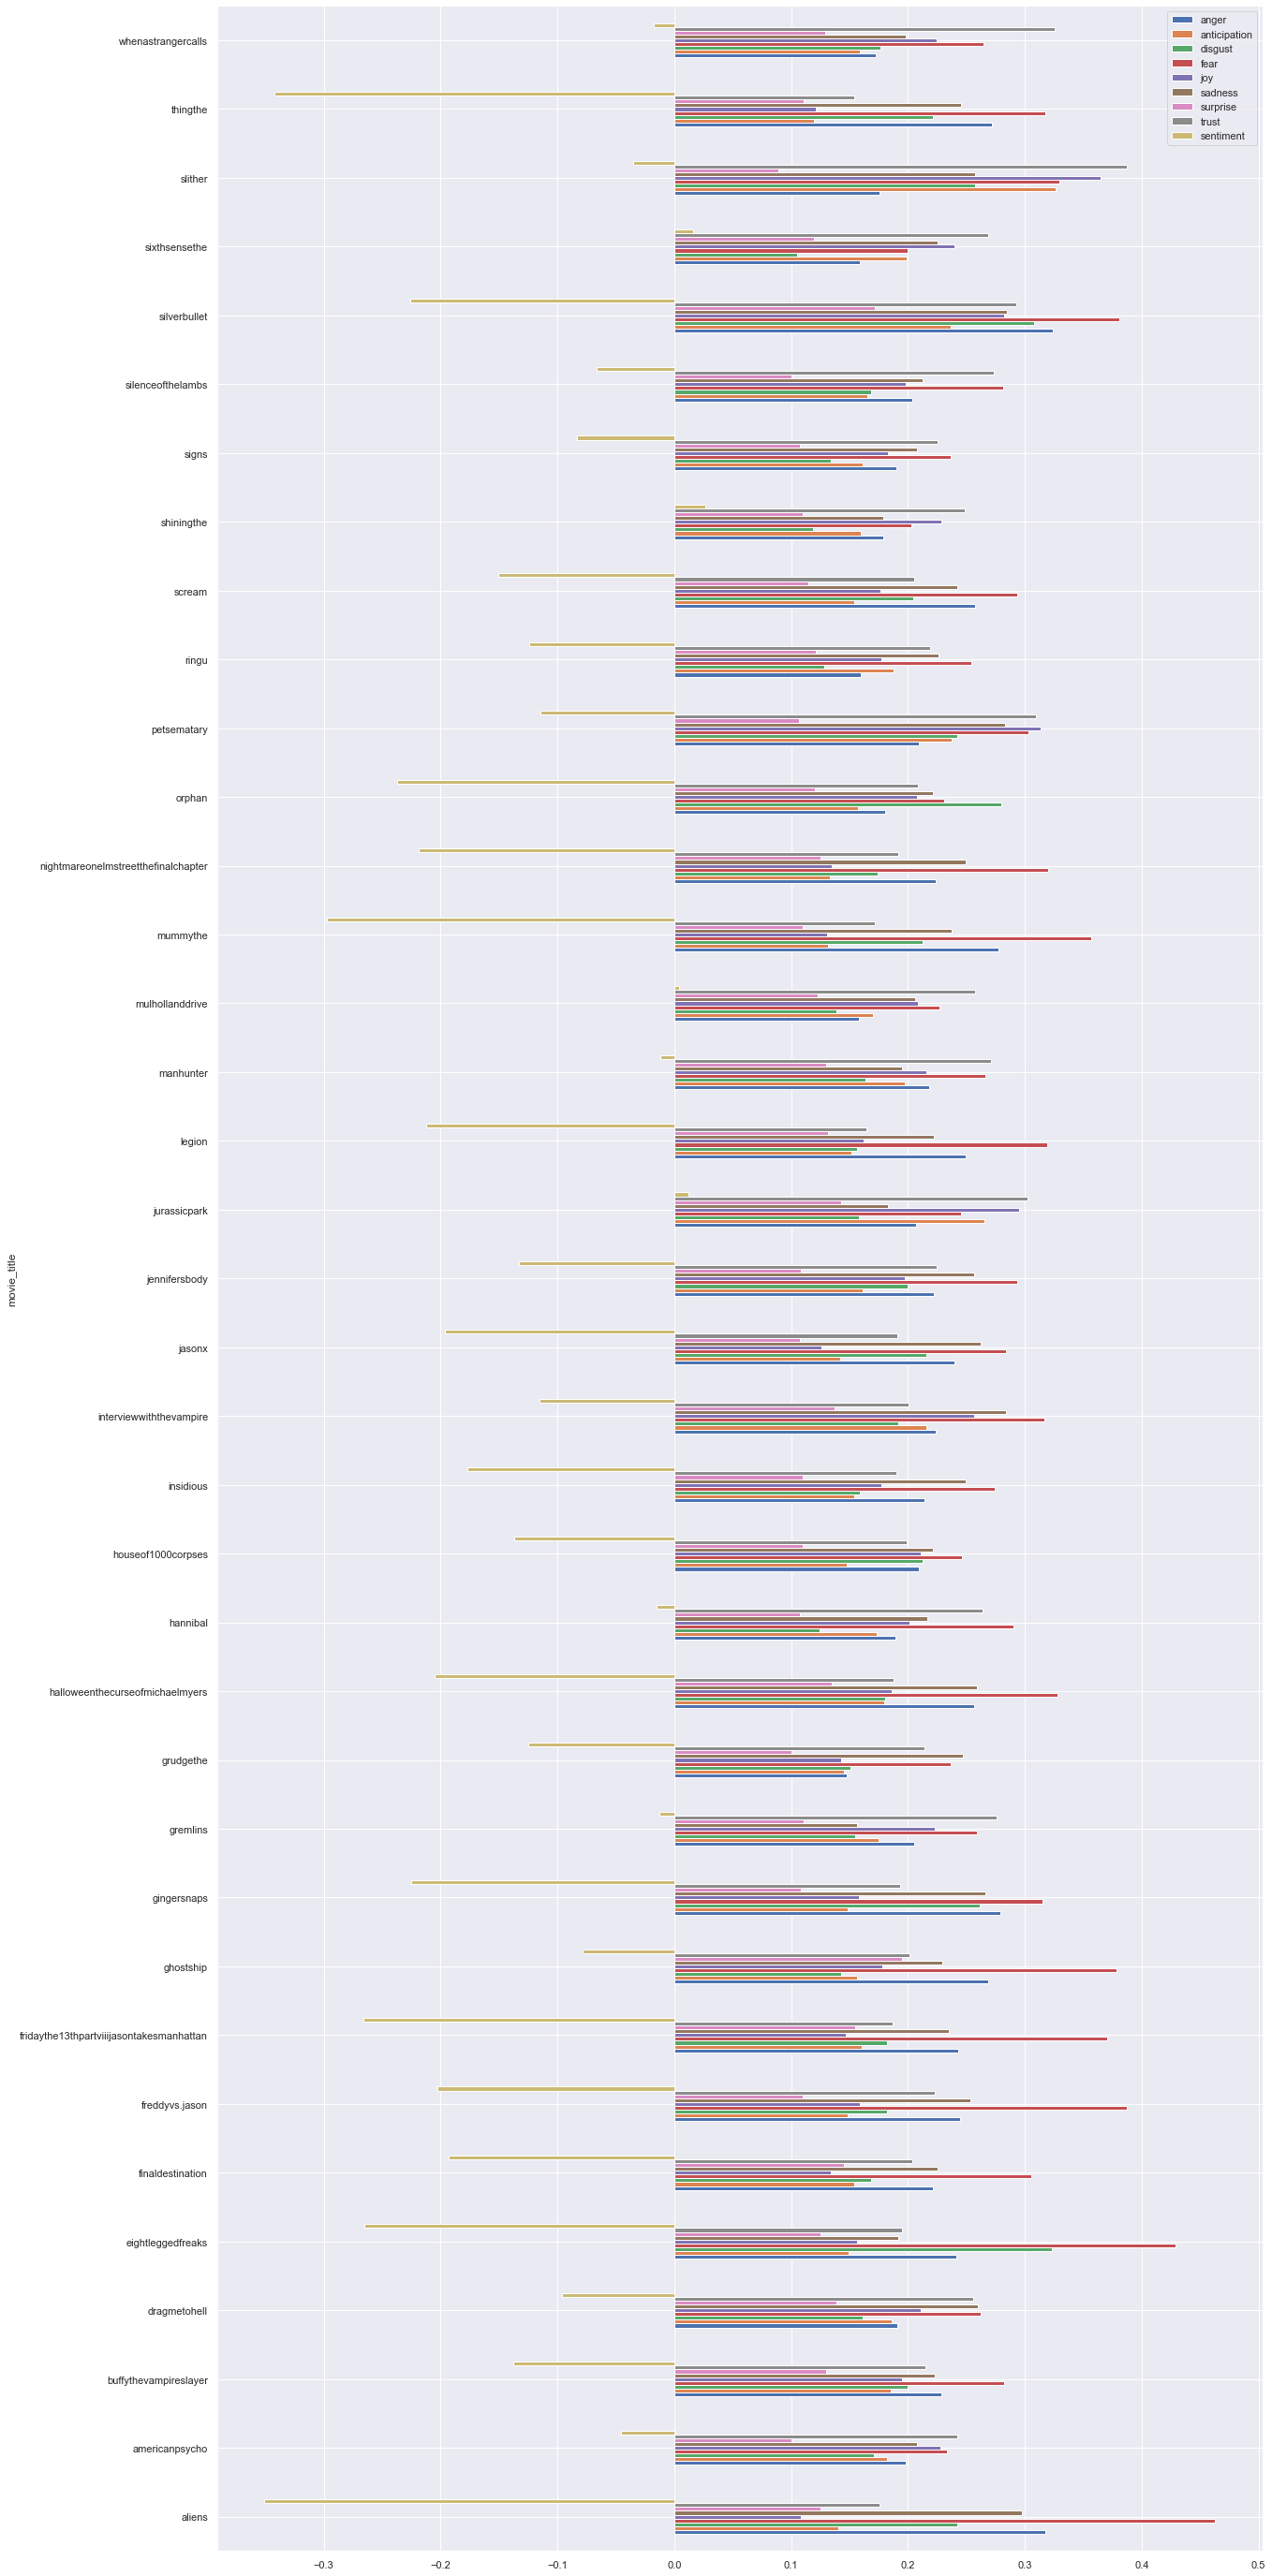

## Interpretation

Certain films, themes, and observations in the data require a more specific focus. One film that must be further analyzed is The Shining (1980) directed by Stanley Kubrick. In multiple areas of analysis this film sticks out from the rest of the films in the corpus. First, in the produced dendrograms The Shining defies classification with the other films in the corpus. Then, looking at the three visuals produced using PCA, two of them, PC0-PC1 and PC1-PC2, both have scenes from The Shining as outliers in the analysis. Upon further inspection, these are the famous ax scenes when Jack Torrance, played by Jack Nicholson, is chasing his wife and child through the Overlook Hotel trying to murder them. This is one of the most famous horror scenes ever filmed, so it was intriguing to see that the PCA analysis picked up on this. One reason for this could be these scenes are very internal scenes taking place not only in a claustrophobic hotel, but in a more cramped bedroom and bathroom as well. Since PC0 and PC1 dealt with interiority, this makes sense. This film also sticks out when more closely analyzing the sentiment score. Somehow this film is one of the only films that has a positive sentiment score. This is more confusing, but the movie does have a happy ending with both members of Jack's family Wendy Torrence, played by Shelley Duvall, and Danny Torrance, played by Danny Lloyd, escaping the hotel while Jack freezes to death in a snowbank. Not exactly the happiest ending, but the killer dies and the protogonists escape, which is more than can be said for some other films in this corpus. Since Jack is dealing with insanity, he is often laughing on screen, which the sentiment analysis may classify as positive, when really it is really negative. 

The 1990s had the least amount of films that stuck out in the larger analysis of the corpus. However, it did have the most unquie topics when considering LDA topic analysis. The 1980s and the 2000s had both topic 3 and topic 18 in common, while the 1990s only had topic 3 in common with those two. Attention can be drawn to topic 2 in this analysis which contained the following terms: face, eyes, hair, hand, room, blood, hands. These terms lend themselves to descriptions of vampires. When thinking about blood, one tends to think about Vampiers. The word Vampire only showed up in the 1990s and in no other decade. In the word2vec analysis, the word vampire was closely associated with other people identiying nouns such as woman, child, and boy. The presence of this word vampire is probably due to the presence of Buffy the Vampire Slayer (1992) and Interview with a Vampire (1994) in the corpus.

The 2000s had the most films represented in the corpus. The film that stuck out the most from the 2000s in the PCA analysis is Sam Raimi's film Drag Me to Hell (2009). Upon further inspection, the scene that stuck out in the PCA analysis of this film, scene 35, just features the protagonist sitting in her car. However this is a very interior location and one of the words in PC3 was car, so this makes sense, but is ultimately uninteresting. Drag Me to Hell in the Cosine distance dendrogram was clusered closely with Halloween III: Season of the Witch (1992), the only film in the Halloween franchise not featuring the main anagonist Michael Myers, and House of 1000 Corpses (2003). All these films deal with santanic themes and specificially witchcraft and the devil. Another film from the 1990s that could be analyzed further is Final Destination (2000). In the Cosine dendrogram, this film is closest to The Shining, but not very close to any other movie. This is because Final Destination does not easily lend itself to classification. The film doesn't really have an antagonist. The antagonist referred to in the film is death, but it's really something more akin to fate. The plot of the movie is the main characters were supposed to die in a plane crash, but a vision by one of the characters tells him and his friends to get off the plane. Throughout the film, the characters are killed one by one through bizzare accidents as "death" claims them.

Overall, differences could be seen between decades, but they were miniscule for the most part. The largest difference between films could actually be seen in their content matter and subgenres. The dendrogram was the most interesting graphic produced by this analysis. Horror is filled with subgenres and the dendrogram does an excellent job of visualizing these differeneces. It was also interesting that topic 3 was present across all there decades in the LDA topic analysis. Topic 3 contained the words door, room, eyes, floor, hall, hand, and stairs. These are all pretty vague terms, but when thinking about how horror films are shot, these terms being the most relevant to each decade makes sense. The use of doors, halls, and stairs are all used in films to build tension. What horrors lurk behind a door? What's moving at the end of that long hallway? What's bumping beneath the stairs? These are all staples of using location for tension in horror films. Then eyes and hand are both unsettling features of creatures and killers in horror films. All the graphics produced for this analysis reveal something about horror films for these 3 decades. Perhaps the scariest thing present in the visuals of this analysis is the hook representing the 1980s in the word2vec analysis.